<a href="https://colab.research.google.com/github/Ravi-ux-star/CryptoTracker/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image


In [2]:
image = Image.open("/content/IMG_20200314_030131_491.jpg")

In [3]:
image_array = np.array(image)
image_array

array([[[206, 210, 213],
        [206, 210, 213],
        [206, 210, 213],
        ...,
        [211, 213, 212],
        [211, 213, 212],
        [211, 213, 212]],

       [[206, 210, 213],
        [206, 210, 213],
        [206, 210, 213],
        ...,
        [211, 213, 212],
        [211, 213, 212],
        [211, 213, 212]],

       [[206, 210, 213],
        [206, 210, 213],
        [206, 210, 213],
        ...,
        [211, 213, 212],
        [211, 213, 212],
        [211, 213, 212]],

       ...,

       [[141, 154, 162],
        [141, 154, 162],
        [141, 154, 162],
        ...,
        [178, 179, 183],
        [179, 178, 183],
        [180, 180, 182]],

       [[139, 152, 161],
        [140, 153, 162],
        [142, 155, 164],
        ...,
        [178, 179, 183],
        [179, 179, 181],
        [180, 180, 182]],

       [[140, 153, 162],
        [140, 153, 162],
        [141, 154, 163],
        ...,
        [178, 179, 183],
        [179, 179, 181],
        [181, 181, 183]]

In [4]:
# reshape the array in to 2D Matrix

In [5]:
reshaped_image = image_array.reshape(-1, 3)

In [6]:
reshaped_image

array([[206, 210, 213],
       [206, 210, 213],
       [206, 210, 213],
       ...,
       [178, 179, 183],
       [179, 179, 181],
       [181, 181, 183]], dtype=uint8)

In [7]:
# no. of clusters
k=16

In [8]:
# apply k-means 

In [9]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(reshaped_image)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [10]:
# obtain the cluster label and centroid

In [11]:
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_


In [12]:
# replacing the pixels with centroids
compressed_image = cluster_centroids[cluster_labels]


In [13]:
#Reshape the compressed image back to the original dimensions
reshaped_compressed_image = compressed_image.reshape(image_array.shape)


In [14]:
# compressing array back to image
compressed_image = Image.fromarray(reshaped_compressed_image.astype(np.uint8))


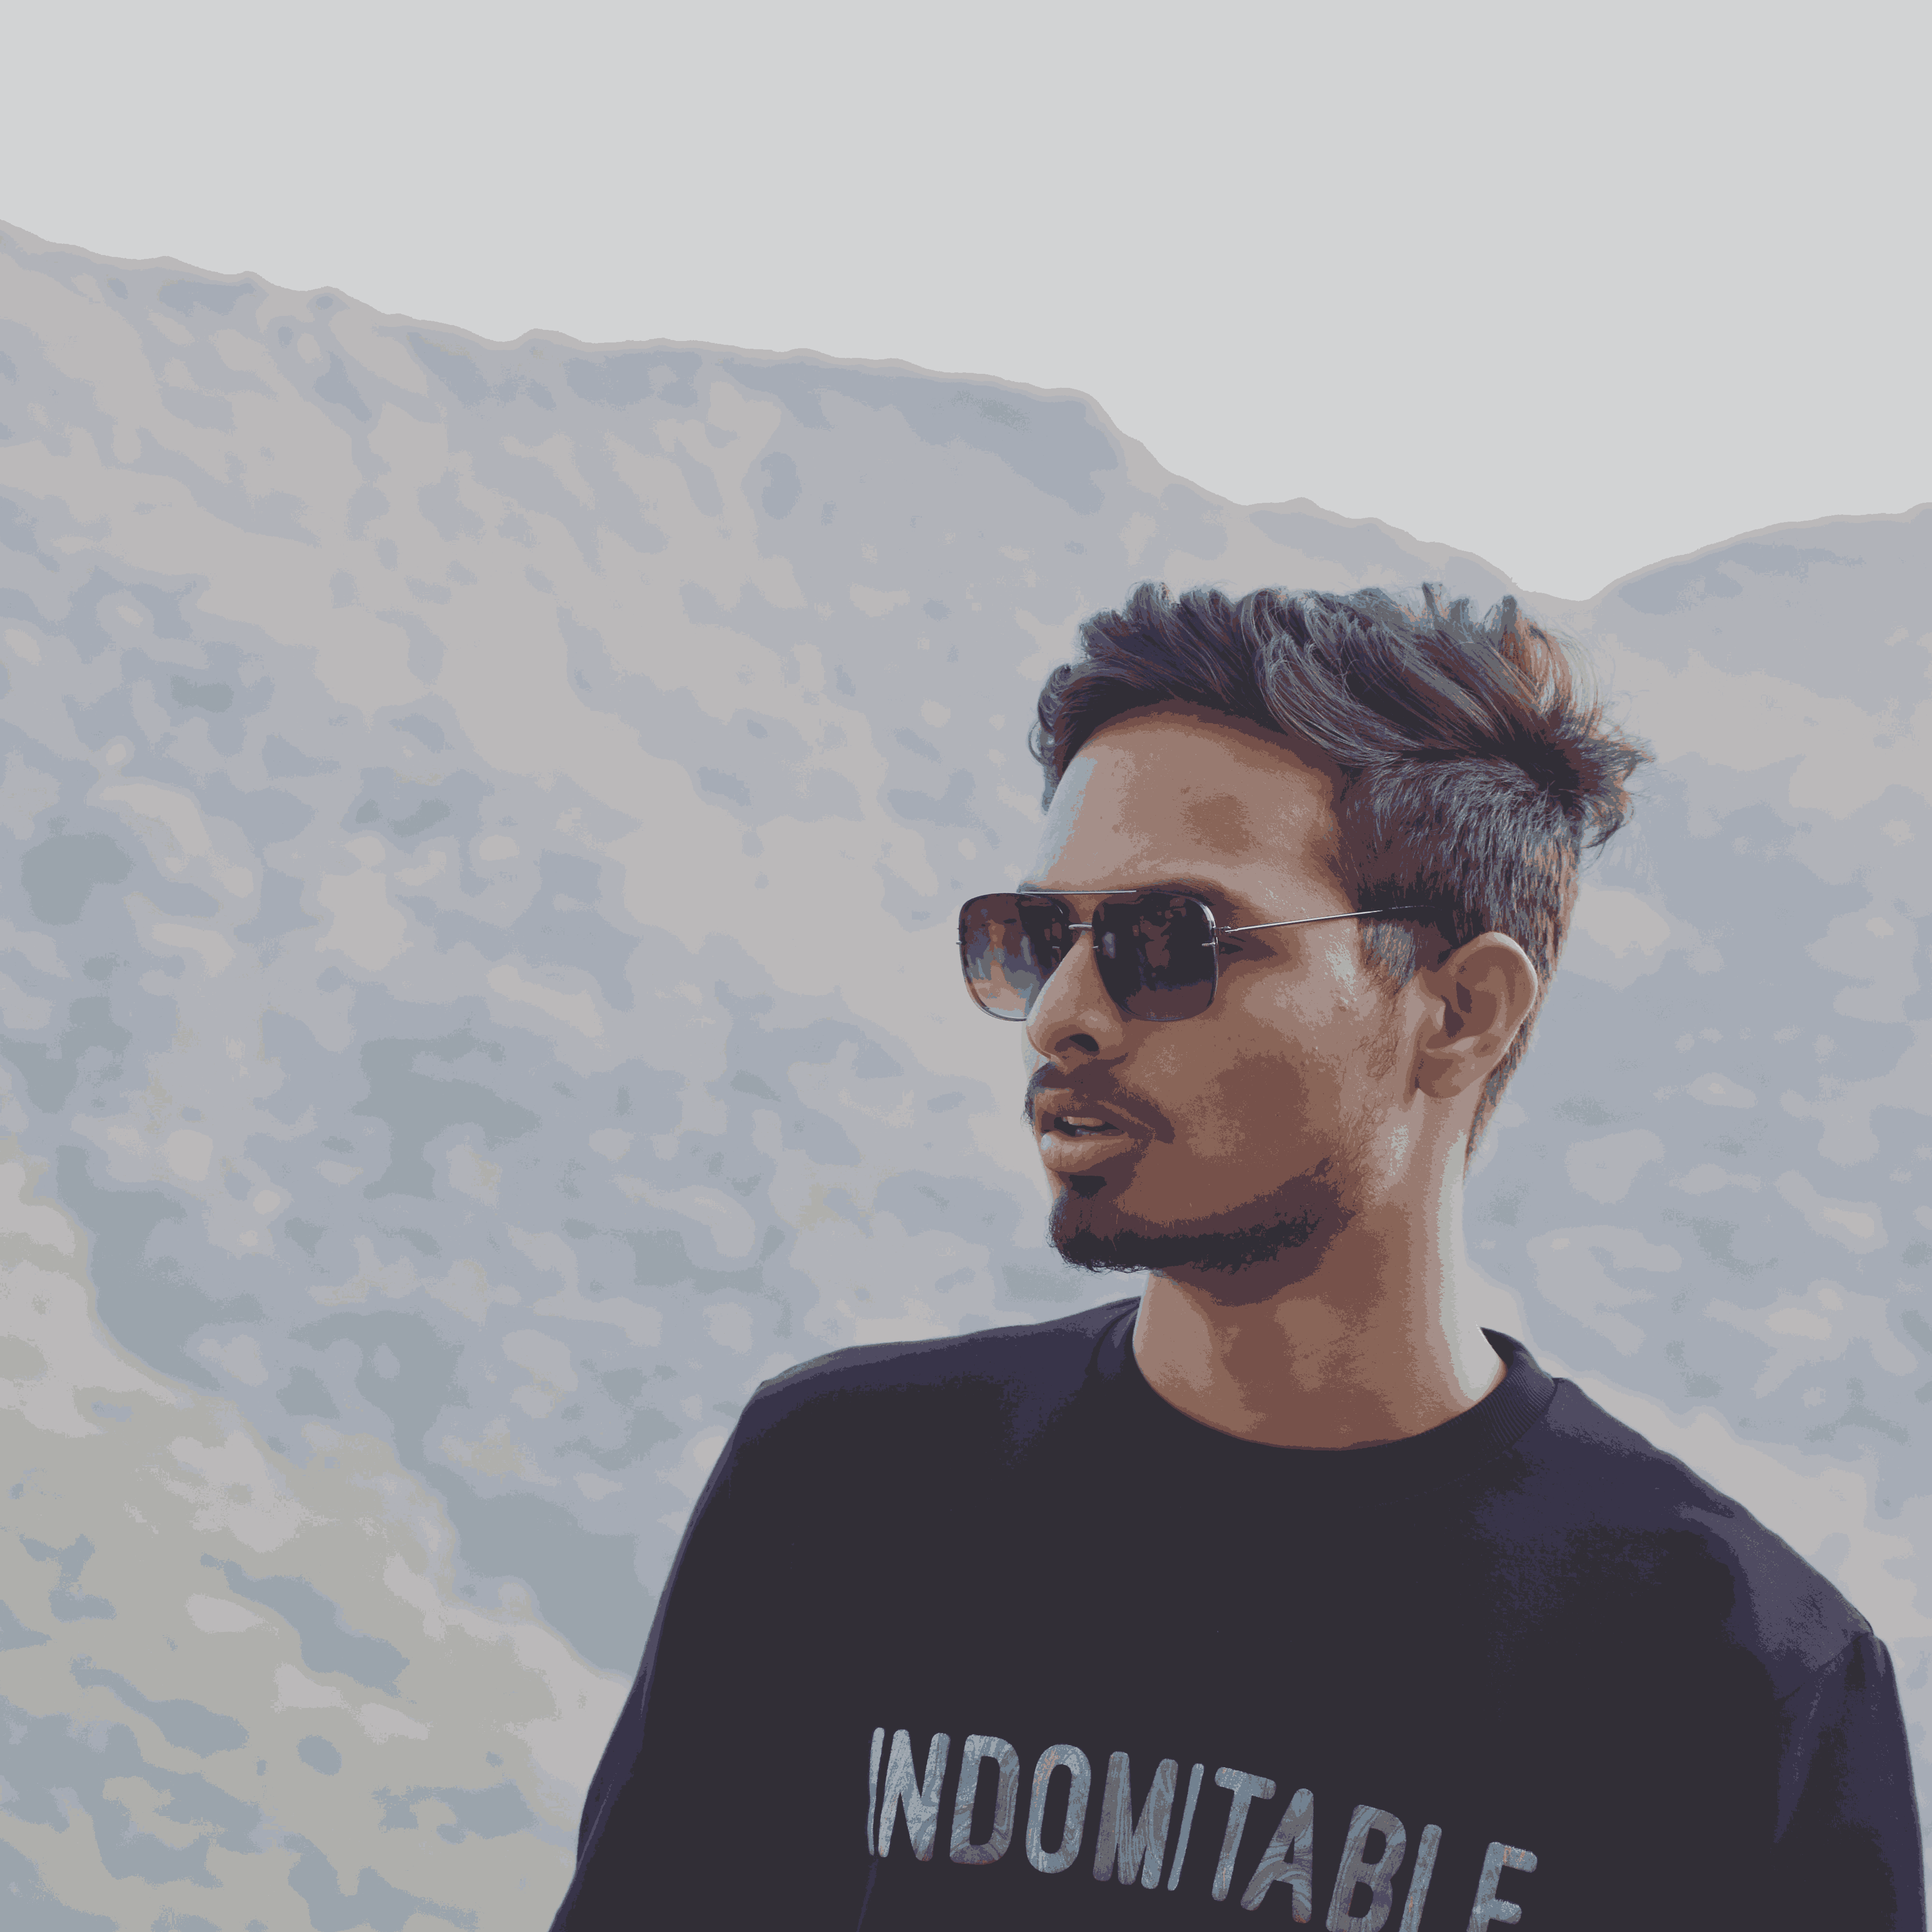

<Figure size 400x200 with 0 Axes>

In [18]:
compressed_image.save("compressed_image.jpg")
plt.figure(figsize=(4, 2))
compressed_image.show()


In [16]:
import os

# Get the file size of the original image
original_image_path = "/content/IMG_20200314_030131_491.jpg"
original_image_size = os.path.getsize(original_image_path)

# Get the file size of the compressed image
compressed_image_path = "compressed_image.jpg"
compressed_image_size = os.path.getsize(compressed_image_path)

# Calculate the compressed percentage
compression_ratio = compressed_image_size / original_image_size
compressed_percentage = (1 - compression_ratio) * 100

print(f"Compressed percentage: {compressed_percentage}%")


Compressed percentage: 45.897963766389374%
